<a href="https://colab.research.google.com/github/moaaztaha/Arabic-Image-Captioning-Demo/blob/main/Demo_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ipywidgets import FileUpload
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import os

def setup():
    print("Cloning repos....")
    os.system("git clone https://github.com/moaaztaha/Arabic-Image-Captioning-Demo")
    os.system("git clone https://github.com/aub-mind/arabert")
    os.system("mv  -v /content/Arabic-Image-Captioning-Demo/* .")
    os.system("pip install -r requirements.txt")
    warnings.filterwarnings("ignore")
setup()

Cloning repos....


In [3]:
# updating dgown before downloading files from gdrive
!pip install --upgrade --no-cache-dir gdown --quiet

# supporting arabic text for matplotlib
!pip install python-bidi --quiet
!pip install arabic-reshaper --quiet

In [4]:
from caption import caption_image, caption_image_viz, visualize_att

[2022-05-21 08:32:28,888 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [5]:
# setting up the environment
# downloading the model

old = False

if old==False:
    if Path('BEST_checkpoint_flickr8k_ar_arabert_pretrained_finetune.pth.tar').is_file():
        print("Arabert Model file exists!!!")
    else:
        print("Downloading Arabert model...")
        os.system('gdown --id 1-6o5yt2oMrgJBlKA_pToQqXpntI-ZYoB')
else:
    if Path('BEST_checkpoint_flickr8k_ar_pretrained_finetune.pth.tar').is_file():
        print("Old Model file exists!!!")
    else:
        print("Downloading Old model...")
        os.system('gdown --id 1-3yPtc-7esopr7dAEMz1G4oBeHdhMc9n')

Arabert Model file exists!!!


# Captioning an image

In [6]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 162822.62it/s]


----------------------------------------------------------------------------------------------------
صبي صغير يقفز في العشب


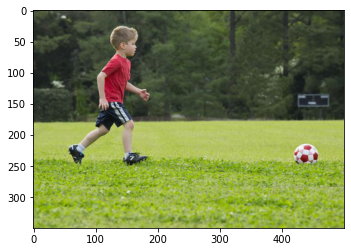

In [7]:
output = caption_image(upload, old=old)
if len(upload.data):
  img=plt.imread("test.png", 0)
  plt.imshow(img)
  # plt.title(output)
print("-"*100)
print(output)

# Caption with Visualization

In [13]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 160998.93it/s]


[tensor(-6.1702, grad_fn=<UnbindBackward0>), tensor(-6.4124, grad_fn=<UnbindBackward0>), tensor(-9.9730, grad_fn=<UnbindBackward0>)]
********** Best 3 Captions **********
صبي صغير يقفز في ال + عشب
صبي صغير يلعب في ال + عشب
صبي صغير يقفز في ال + عشب ال + قدم
*************************************


100%|██████████| 24000/24000 [00:00<00:00, 156965.60it/s]


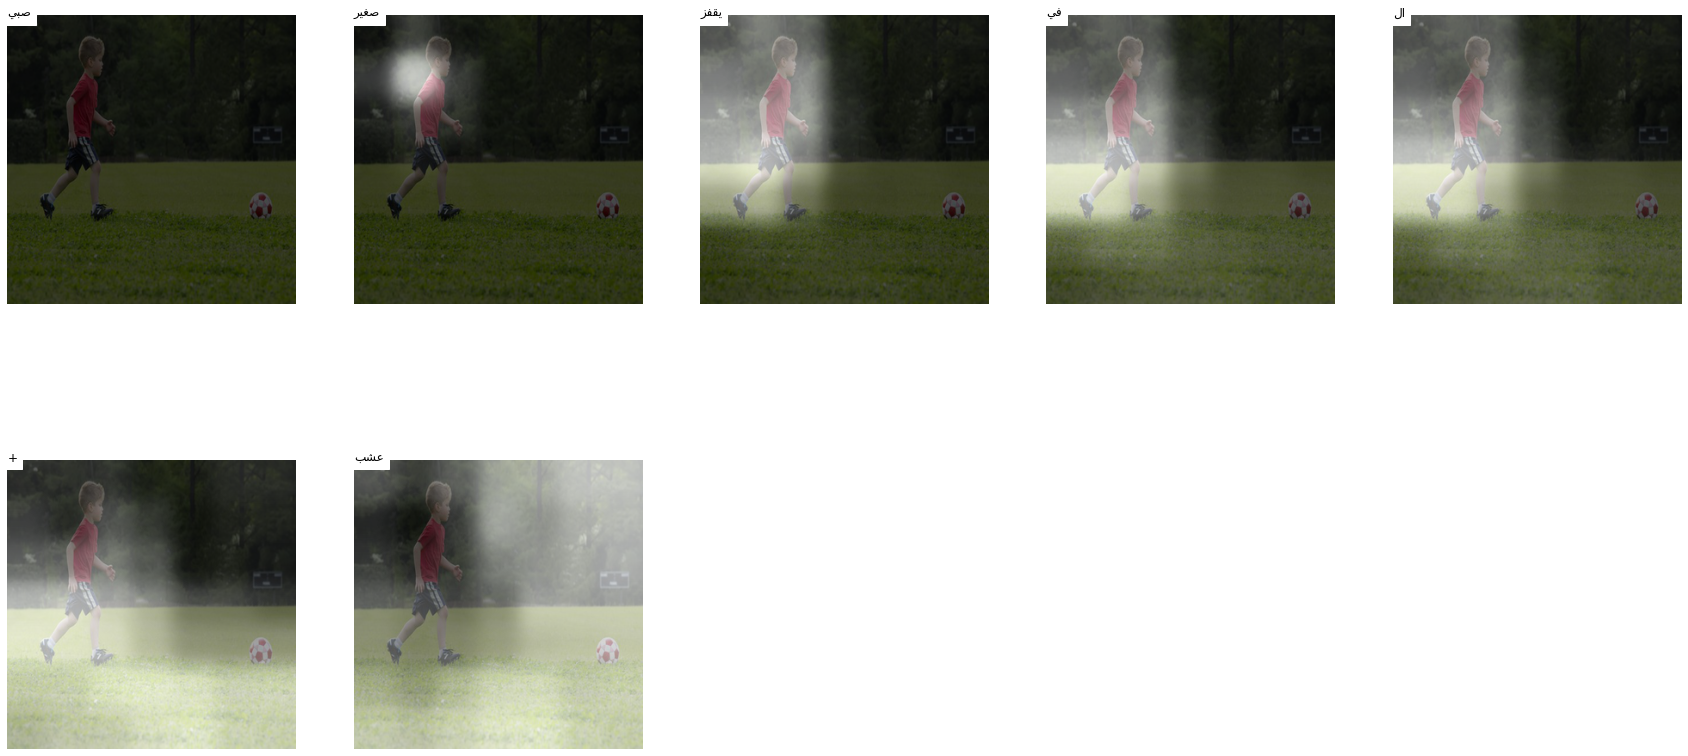

In [8]:
if len(upload.data):
  alphas, seq, all_caps = caption_image_viz(upload, old=old)
  print("********** Best 3 Captions **********")
  for c in all_caps:
    print(c)
  print("*************************************")
  visualize_att(seq, alphas, old=old)